In [ ]:
import glob
from google.colab import drive

# Mounting drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Creating a directorty to load data

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/data"

107620_256618_bundle_archive.zip  325566_653195_bundle_archive.zip
316368_639622_bundle_archive.zip  338555_671851_bundle_archive.zip


Dataset 1 -
Unzippinfg the datafiles

In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/data/325566_653195_bundle_archive.zip"
!ls "AudioWAV"

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
crema = os.listdir('AudioWAV')

Audio file was read and label was extracted 


In [ ]:
file_emotion = []
file_path = []

for file in crema:
    # storing file paths
    file_path.append('AudioWAV/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,AudioWAV/1003_ITH_ANG_XX.wav
1,sad,AudioWAV/1028_MTI_SAD_XX.wav
2,neutral,AudioWAV/1028_IWL_NEU_XX.wav
3,angry,AudioWAV/1086_IWW_ANG_XX.wav
4,neutral,AudioWAV/1044_IWW_NEU_XX.wav


In [ ]:
Crema_df.shape

(7442, 2)

Dataset-2

In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/data/316368_639622_bundle_archive.zip"

In [ ]:
!ls

 AudioWAV     'tess toronto emotional speech set data'
 drive	      'TESS Toronto emotional speech set data'
 sample_data


In [ ]:
tess = os.listdir('TESS Toronto emotional speech set data')

In [ ]:
file_emotion = []
file_path = []

for dir in tess:
    directories = os.listdir('TESS Toronto emotional speech set data' +'/'  + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append('TESS Toronto emotional speech set data/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df
Tess_df.shape


(2800, 2)

Dataset-3

In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/data/107620_256618_bundle_archive.zip"


In [ ]:
ravdess = os.listdir('audio_speech_actors_01-24')


In [ ]:
#ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir('audio_speech_actors_01-24' +'/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append('audio_speech_actors_01-24' +'/'+ dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.shape

(1440, 2)

Dataset-4


In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/data/338555_671851_bundle_archive.zip"


In [ ]:
!ls


 Actor_01   Actor_09   Actor_17   ALL
 Actor_02   Actor_10   Actor_18   audio_speech_actors_01-24
 Actor_03   Actor_11   Actor_19   AudioWAV
 Actor_04   Actor_12   Actor_20   drive
 Actor_05   Actor_13   Actor_21   sample_data
 Actor_06   Actor_14   Actor_22  'tess toronto emotional speech set data'
 Actor_07   Actor_15   Actor_23  'TESS Toronto emotional speech set data'
 Actor_08   Actor_16   Actor_24


In [ ]:
savee = os.listdir('ALL')

In [ ]:
file_emotion = []
file_path = []

for file in savee:
    file_path.append('ALL/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.shape

(480, 2)

Combing all four dataset

In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0, ignore_index=True)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,audio_speech_actors_01-24/Actor_01/03-01-07-01...
1,disgust,audio_speech_actors_01-24/Actor_01/03-01-07-02...
2,happy,audio_speech_actors_01-24/Actor_01/03-01-03-01...
3,disgust,audio_speech_actors_01-24/Actor_01/03-01-07-02...
4,neutral,audio_speech_actors_01-24/Actor_01/03-01-01-01...


In [ ]:
data_path.shape

(12162, 2)

MFCC feature Extraction 

In [ ]:
df = pd.DataFrame(columns=['feature'])
counter = 0
def extract_features(data,sample_rate):
    global counter
    result = np.array([])
    
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, mfcc)) # stacking horizontally
    df.loc[counter] = [mfcc]
    counter= counter+1

   
    return df

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    # result = np.array(res1)
    result = res1
    
   
    
    # return result


In [ ]:
data_path.Emotions.unique()

array(['disgust', 'happy', 'neutral', 'calm', 'sad', 'angry', 'surprise',
       'fear'], dtype=object)

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
  get_features(path)
   

In [ ]:
df.shape

(12162, 1)

In [ ]:

df2 = pd.concat([data_path,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df2.head()

In [ ]:
df2.shape

(12162, 22)

In [ ]:
Y = df2['Emotions'].values
df3=df2.drop(['Emotions','Path'],axis=1)
X = df3.iloc[: ,:].values

In [ ]:
Y.shape

(12162,)

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 20), (9121, 8), (3041, 20), (3041, 8))

In [ ]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 20), (9121, 8), (3041, 20), (3041, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9121, 20, 1), (9121, 8), (3041, 20, 1), (3041, 8))

In [ ]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))


model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 20, 256)           1536      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 256)           327936    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5, 256)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 128)            163968    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 3, 128)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 128)           

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[callback])

Train on 9121 samples, validate on 3041 samples
Epoch 1/50
9121/9121 [==============================] - 19s 2ms/step - loss: 1.9547 - accuracy: 0.2074 - val_loss: 1.7646 - val_accuracy: 0.2976
Epoch 2/50
9121/9121 [==============================] - 18s 2ms/step - loss: 1.7708 - accuracy: 0.2905 - val_loss: 1.6206 - val_accuracy: 0.3574
Epoch 3/50
9121/9121 [==============================] - 18s 2ms/step - loss: 1.6457 - accuracy: 0.3458 - val_loss: 1.5072 - val_accuracy: 0.4028
Epoch 4/50
9121/9121 [==============================] - 18s 2ms/step - loss: 1.5612 - accuracy: 0.3748 - val_loss: 1.4375 - val_accuracy: 0.4163
Epoch 5/50
9121/9121 [==============================] - 18s 2ms/step - loss: 1.5167 - accuracy: 0.3897 - val_loss: 1.4118 - val_accuracy: 0.4288
Epoch 6/50
9121/9121 [==============================] - 19s 2ms/step - loss: 1.4810 - accuracy: 0.4052 - val_loss: 1.3676 - val_accuracy: 0.4535
Epoch 7/50
9121/9121 [==============================] - 18s 2ms/step - loss: 1.440

3041/3041 [==============================] - 1s 276us/step
Accuracy of our model on test data :  53.30483317375183 %


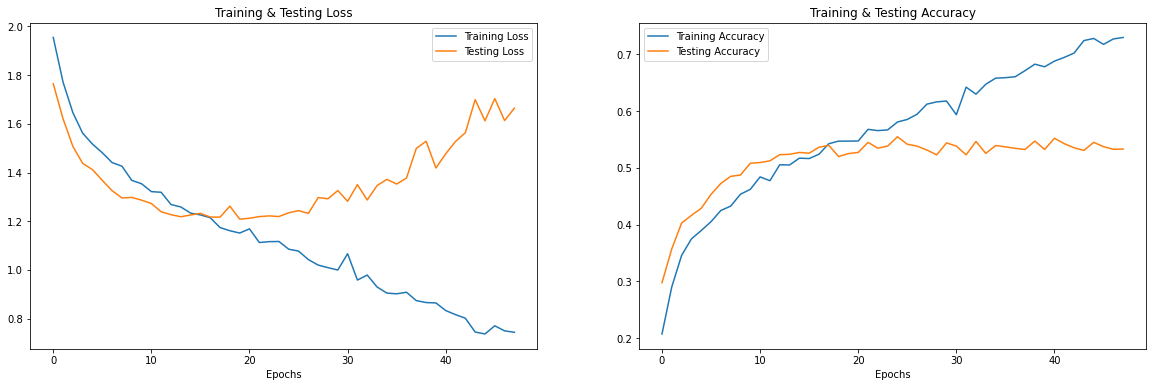

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(48)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(5)

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,happy
2,happy,happy
3,surprise,surprise
4,happy,happy


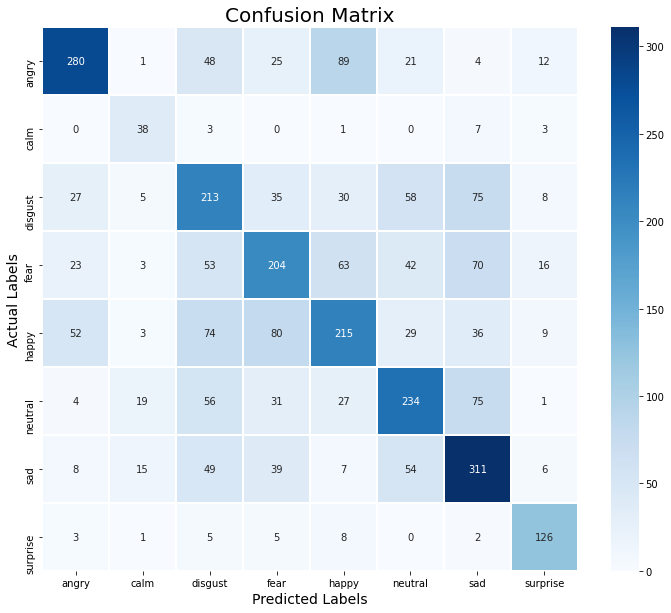

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.71      0.58      0.64       480
        calm       0.45      0.73      0.55        52
     disgust       0.43      0.47      0.45       451
        fear       0.49      0.43      0.46       474
       happy       0.49      0.43      0.46       498
     neutral       0.53      0.52      0.53       447
         sad       0.54      0.64      0.58       489
    surprise       0.70      0.84      0.76       150

    accuracy                           0.53      3041
   macro avg       0.54      0.58      0.55      3041
weighted avg       0.54      0.53      0.53      3041

